In [116]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

import imblearn

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# EDA и Research анализ.

In [84]:
dataset = pd.read_csv("dataset.csv")

dataset.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Удаляем столбец Unnamed и track_id, так как они не несут полезной для анализа информации, а просто являются уникальными значениями для каждого трека. И заменяем столбец, отвечающий за длительности трека в мс, на столбец, отвечающий за длительность трека в минутах.

In [85]:
dataset = dataset.drop("track_id", axis=1)
dataset = dataset.drop("Unnamed: 0", axis=1)
dataset["duration_ms"] = dataset["duration_ms"] / 1000 / 60
dataset = dataset.rename(columns={"duration_ms": "duration_min"})
dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_min      114000 non-null  float64
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

Определяем, какие жанры являются наиболее популярными

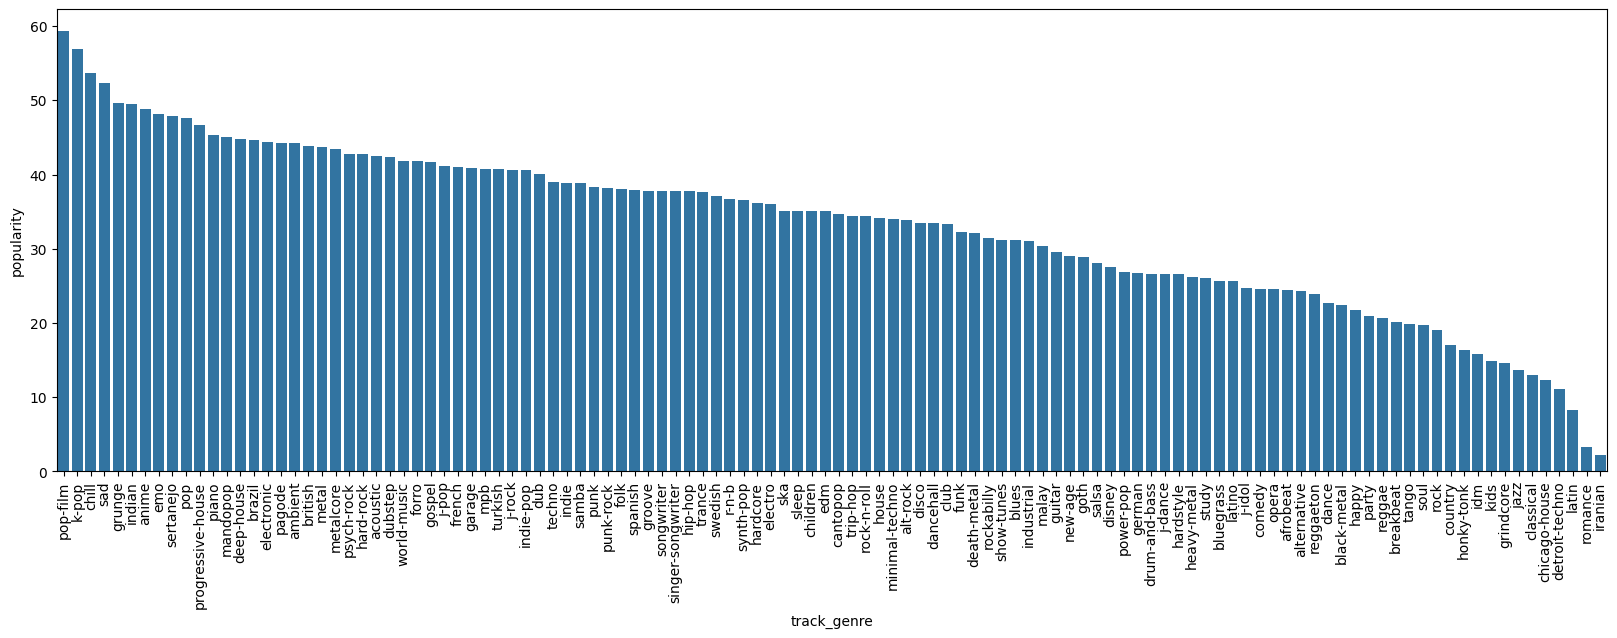

In [63]:
top_genres = dataset.groupby("track_genre").aggregate({"popularity": "mean"}).sort_values(by="popularity", ascending=False)

plt.figure(figsize=(20, 6))
plt.xticks(rotation=90)
sns.barplot(data=top_genres, x="track_genre", y="popularity")
plt.show()

Выводим топ 10 самых популярных треков.

In [64]:
most_popular_songs = dataset.sort_values(by="popularity", ascending=False)

most_popular_songs.head(10)

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,2.615717,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,2.615717,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,3.315617,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
89411,Manuel Turizo,La Bachata,La Bachata,98,2.710617,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggaeton
81210,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,2.920633,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop
30003,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,2.920633,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,edm
20008,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,2.920633,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance
67356,Manuel Turizo,La Bachata,La Bachata,98,2.710617,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latin
88410,Manuel Turizo,La Bachata,La Bachata,98,2.710617,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,reggae
68303,Manuel Turizo,La Bachata,La Bachata,98,2.710617,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino


При выводе топ 10 треков было замечено, что многие треки повторяются, это связано с тем, что у трека может быть несколько жанров или он находится в разных альбомах.

Добавляем новый столбец с полным названием трека: <Исполнитель> / <Название трека> - и удаляем столбы с названием трека, артистом и альбомом, чтобы избавиться от дубликатов.

In [86]:
dataset["full_name"] = dataset["artists"] + " / " + dataset["track_name"]

dataset = dataset.drop(columns=["album_name", "track_name", "artists"]).drop_duplicates()

In [36]:
dataset.head()

,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,full_name
0,73,3.844433,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,Gen Hoshino / Comedy
1,55,2.493500,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,Ben Woodward / Ghost - Acoustic
2,57,3.513767,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,Ingrid Michaelson;ZAYN / To Begin Again
3,71,3.365550,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,Kina Grannis / Can't Help Falling In Love
4,82,3.314217,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,Chord Overstreet / Hold On


## Зависимость популярности трека от его танцевальности (danceability)

Danceability (танцевальность): Danceability описывает пригодность дорожки для танцев на основании таких музыкальных элементов, как темп, стабильность ритма, сила долей и общее постоянство. Композиции со значением 0.0 наименее танцевальные, со значением 1.0 — наиболее танцевальные.

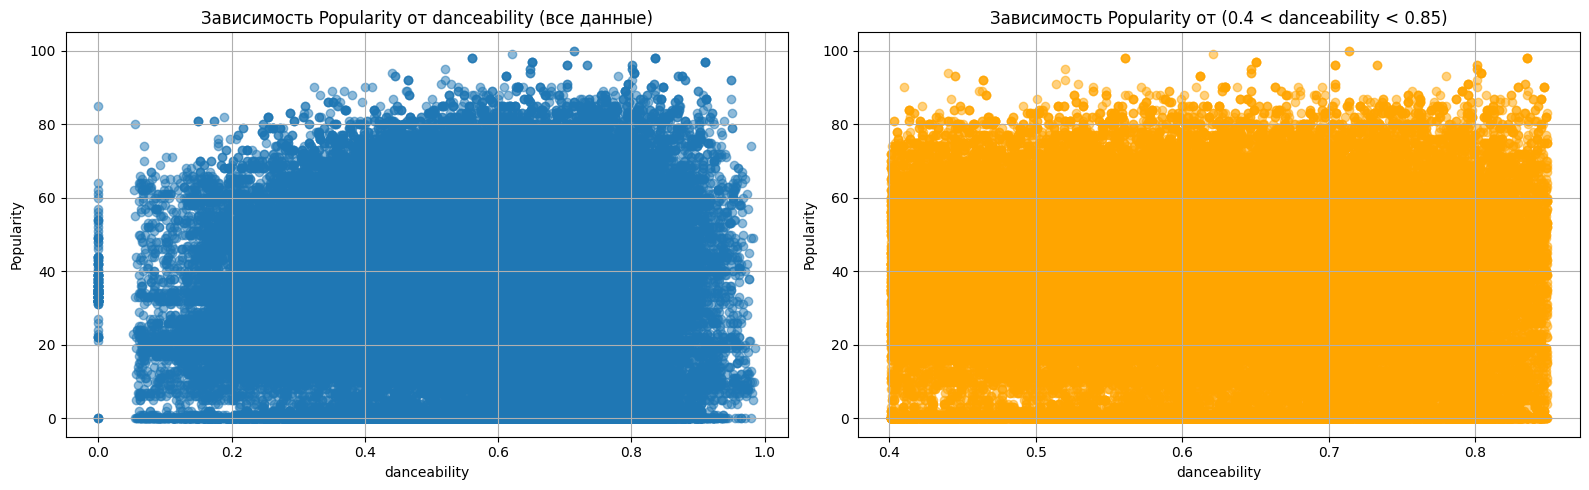

In [14]:
# Данные для графика
low_range_dataset = dataset.query("0.4 < danceability < 0.85")
danceability_column = dataset["danceability"]
low_range_column = low_range_dataset["danceability"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(danceability_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от danceability (все данные)')
axes[0].set_xlabel('danceability')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с 0.4 < danceability < 0.85
axes[1].scatter(low_range_column, low_range_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от (0.4 < danceability < 0.85)')
axes[1].set_xlabel('danceability')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Зависимость популярности трека от его энергичности (energy)

Energy (энергия): это величина в интервале от 0.0 до 1.0, характеризующая критерий восприятия «яркости» и «активности» песни. Обычно энергичные композиции быстрые, громкие и шумные. Например, высокой энергией обладает death metal, а прелюдия Баха имеет по этой шкале низкие показатели.

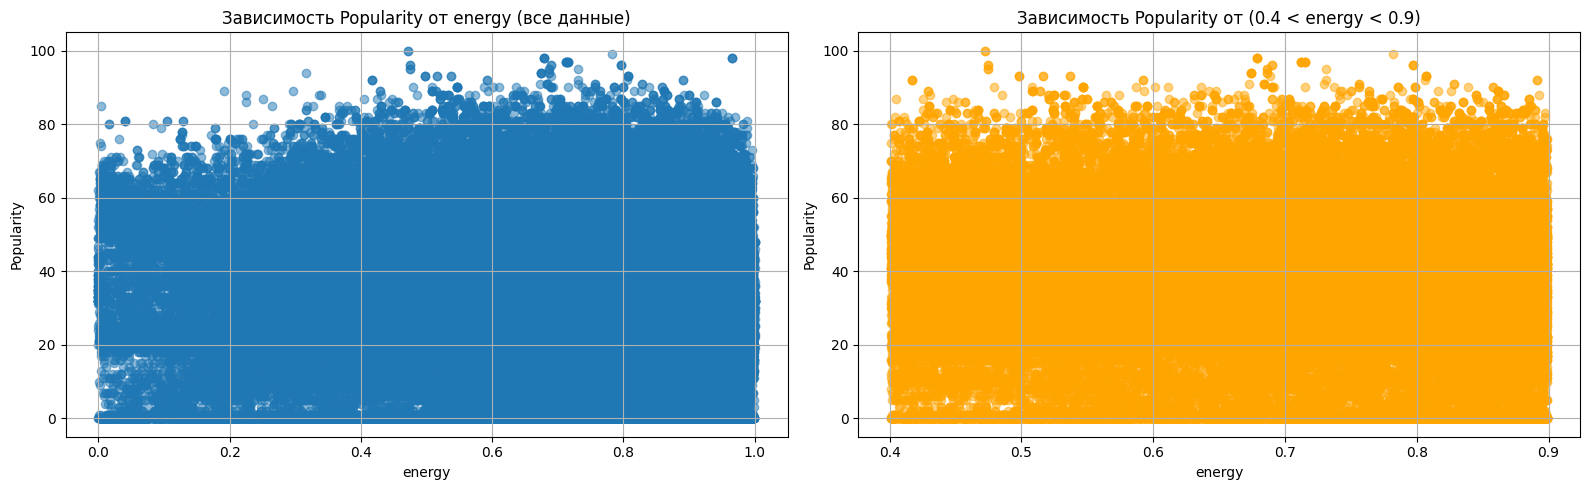

In [15]:
# Данные для графика
low_range_dataset = dataset.query("0.4 < energy < 0.9")
energy_column = dataset["energy"]
low_range_column = low_range_dataset["energy"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(energy_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от energy (все данные)')
axes[0].set_xlabel('energy')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с 0.4 < energy < 0.9
axes[1].scatter(low_range_column, low_range_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от (0.4 < energy < 0.9)')
axes[1].set_xlabel('energy')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Зависимость популярности трека от его длительности в минутах (duration_min)

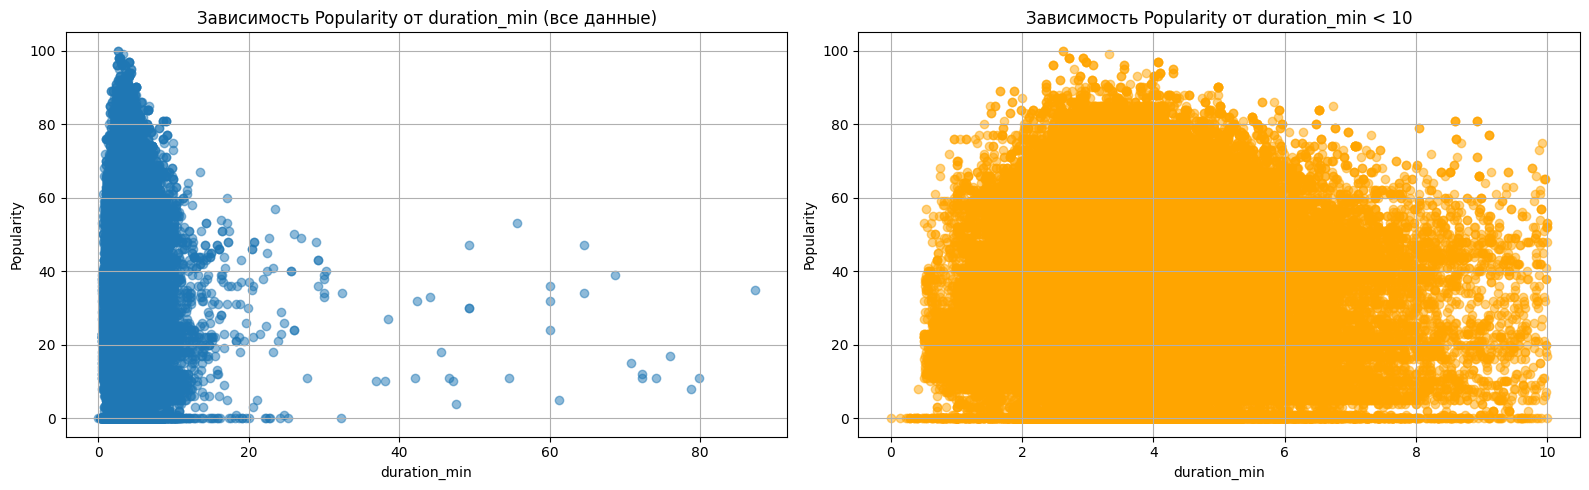

In [16]:
# Данные для графика
low_duration_dataset = dataset.query("duration_min < 10")
duration_min_column = dataset["duration_min"]
low_duration_column = low_duration_dataset["duration_min"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(duration_min_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от duration_min (все данные)')
axes[0].set_xlabel('duration_min')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с duration_min < 10
axes[1].scatter(low_duration_column, low_duration_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от duration_min < 10')
axes[1].set_xlabel('duration_min')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Зависимость популярности трека от его громкости (loudness)

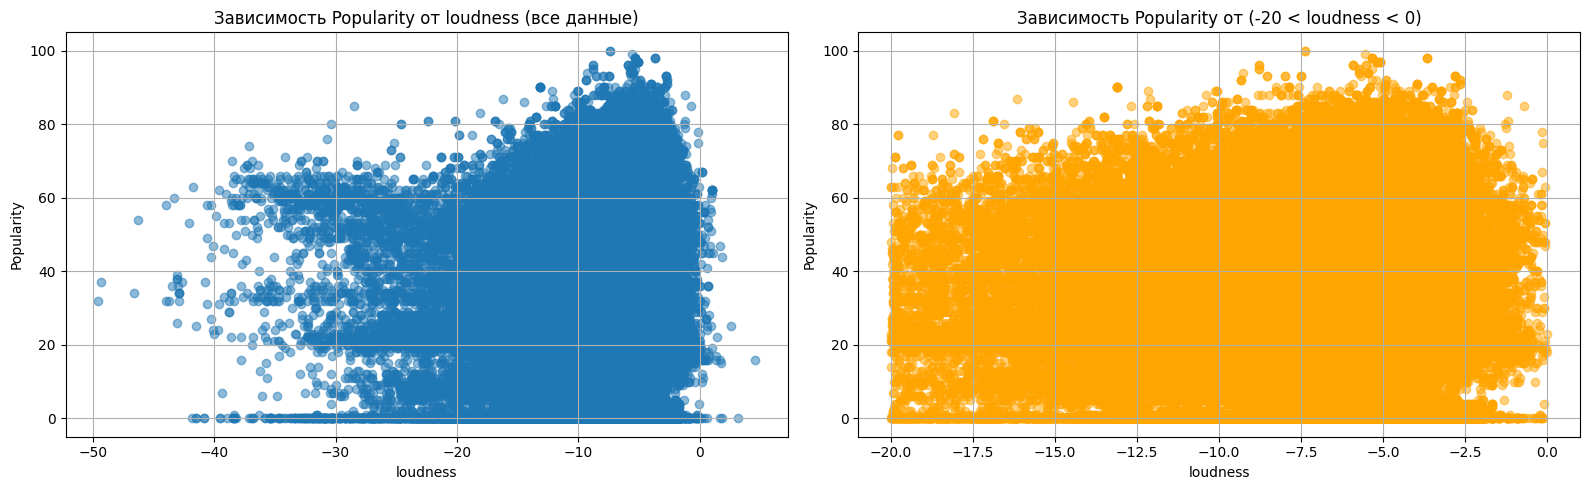

In [17]:
# Данные для графика
low_range_dataset = dataset.query("-20 < loudness < 0")
loudness_column = dataset["loudness"]
low_range_column = low_range_dataset["loudness"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(loudness_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от loudness (все данные)')
axes[0].set_xlabel('loudness')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с -20 < loudness < 0
axes[1].scatter(low_range_column, low_range_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от (-20 < loudness < 0)')
axes[1].set_xlabel('loudness')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Зависимость популярности трека от доли слов в треке (speechiness)

Speechiness (текст): Speechiness обнаруживает присутствие текста в песне. Если speechiness композиции выше 0.66, то она скорее всего состоит из текста, значение от 0.33 до 0.66 означает, что песня может содержать и музыку, и слова, а значение ниже 0.33 означает, что в песне нет никаких слов.

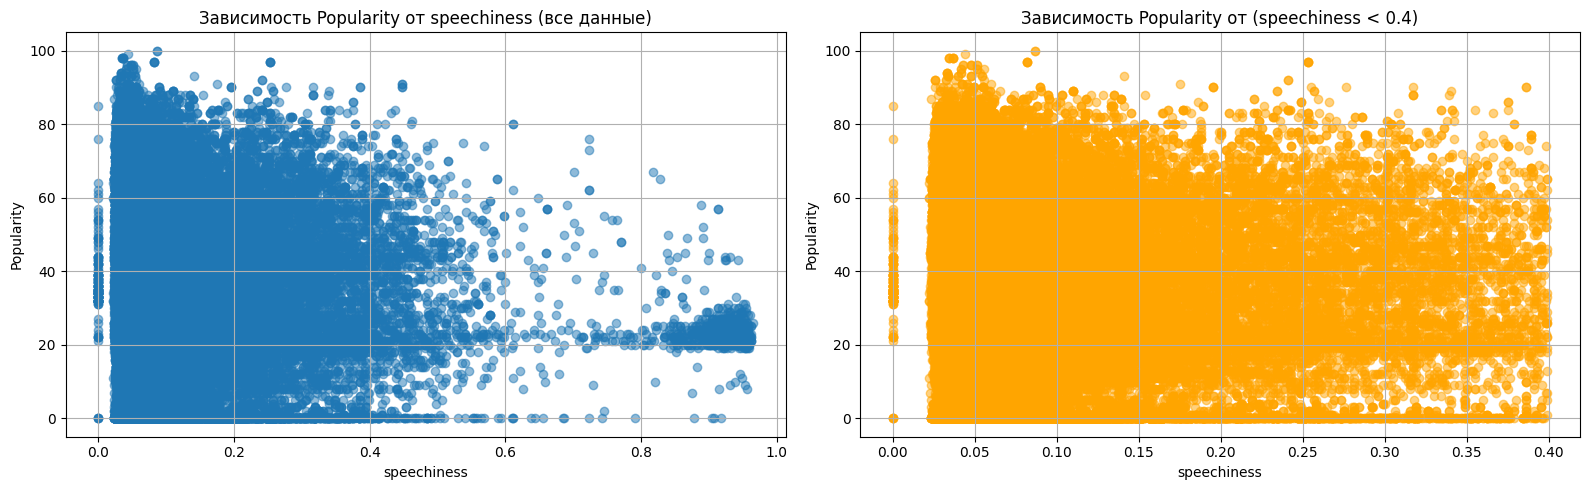

In [18]:
# Данные для графика
low_range_dataset = dataset.query("speechiness < 0.4")
speechiness_column = dataset["speechiness"]
low_range_column = low_range_dataset["speechiness"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(speechiness_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от speechiness (все данные)')
axes[0].set_xlabel('speechiness')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с speechiness < 0.4
axes[1].scatter(low_range_column, low_range_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от (speechiness < 0.4)')
axes[1].set_xlabel('speechiness')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Зависимость популярности трека от акустичности (acousticness)

Acousticness (акустика): мера уверенности в том, что композиция является акустической в интервале от 0.0 до 1.0. Значение 1.0 обозначает высокую уверенность в том, что композиция акустическая.

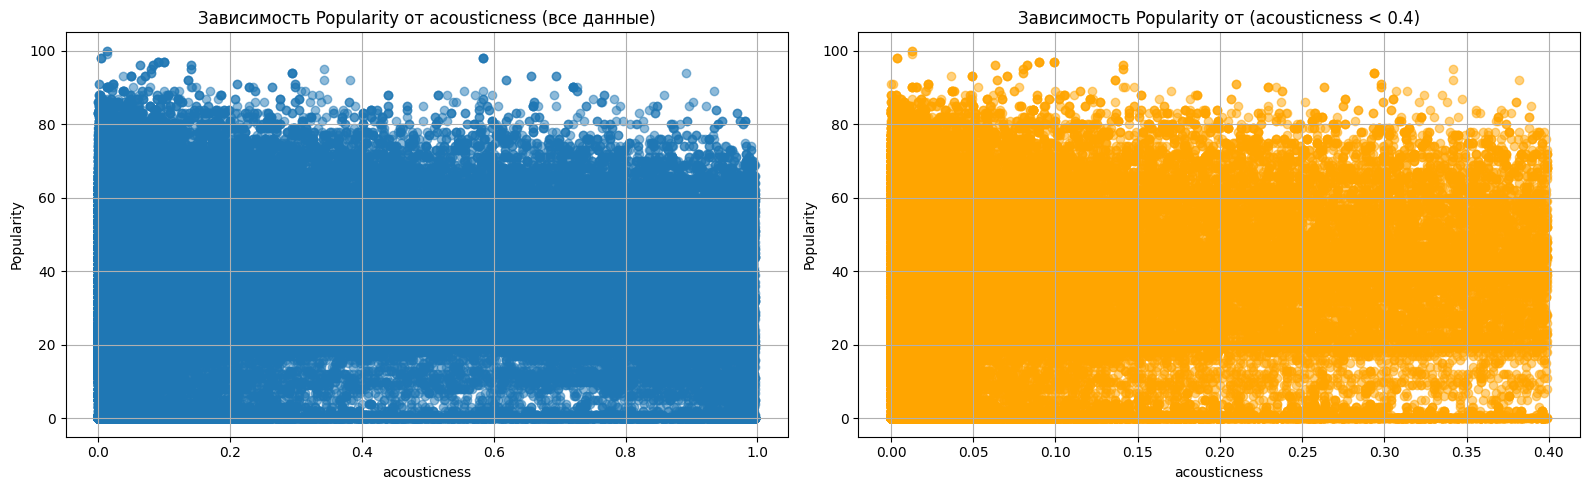

In [19]:
# Данные для графика
low_range_dataset = dataset.query("acousticness < 0.4")
acousticness_column = dataset["acousticness"]
low_range_column = low_range_dataset["acousticness"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(acousticness_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от acousticness (все данные)')
axes[0].set_xlabel('acousticness')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с acousticness < 0.4
axes[1].scatter(low_range_column, low_range_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от (acousticness < 0.4)')
axes[1].set_xlabel('acousticness')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Зависимость популярности трека от доли инструментов в треке (instrumentalness)

Instrumentalness (инструментальность): прогнозирует, что в треке нет вокала. В этом контексте звуки «оу» и «а-а-а» считаются инструментальными. Рэп или треки со словами очевидно являются «вокальными». Чем ближе значение инструментальности к 1.0, тем выше вероятность того, что в треке не содержится голоса.

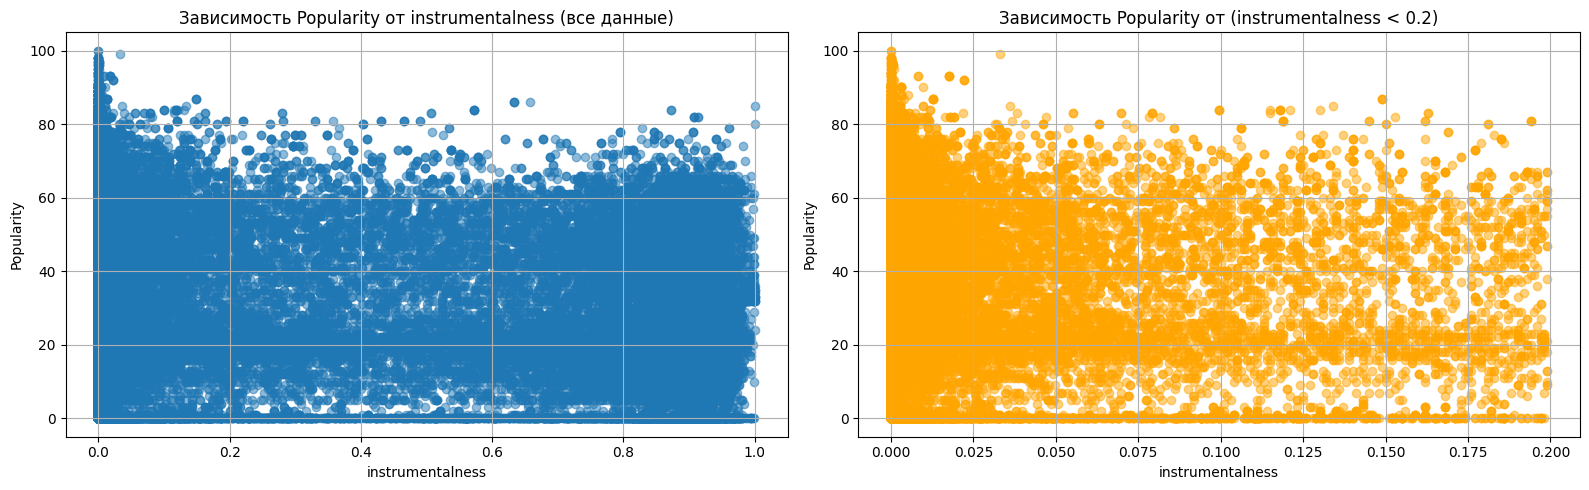

In [20]:
# Данные для графика
low_range_dataset = dataset.query("instrumentalness < 0.2")
instrumentalness_column = dataset["instrumentalness"]
low_range_column = low_range_dataset["instrumentalness"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(instrumentalness_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от instrumentalness (все данные)')
axes[0].set_xlabel('instrumentalness')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с instrumentalness < 0.2
axes[1].scatter(low_range_column, low_range_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от (instrumentalness < 0.2)')
axes[1].set_xlabel('instrumentalness')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Зависимость популярности от трека от доли живого исполнения (liveness)

Liveness (живое исполнение): распознаёт присутствие в записи слушателей. Чем больше значения liveness, тем выше вероятность того, что песня исполнялась вживую. Значение выше 0.8 даёт серьёзную уверенность в живом исполнении.

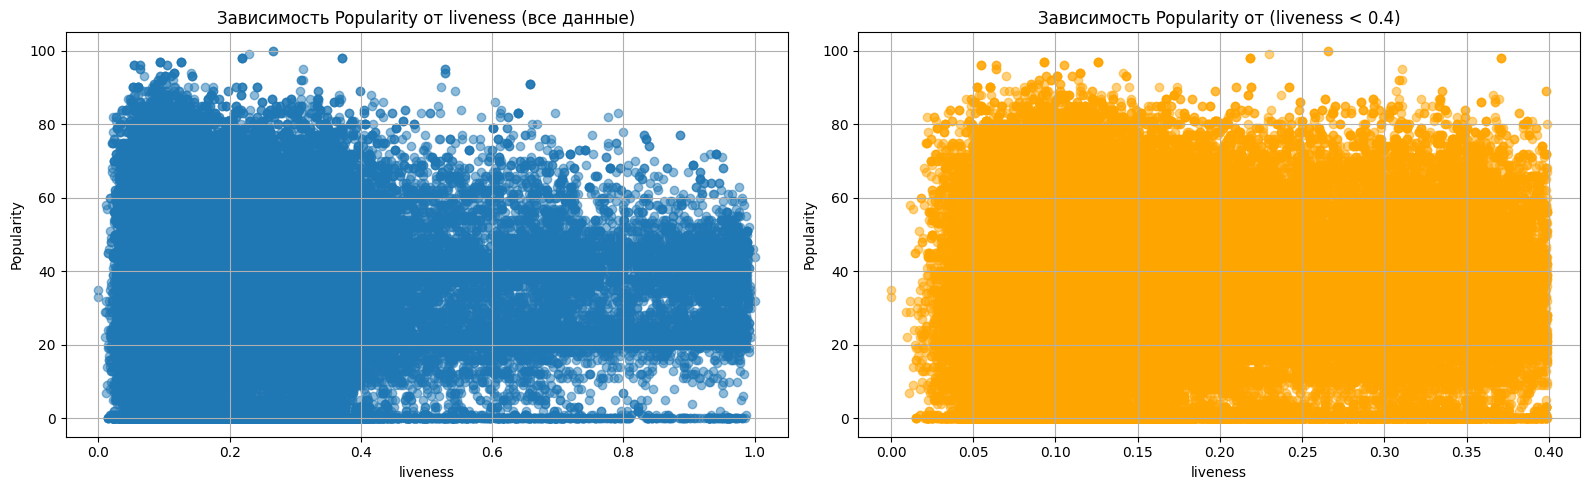

In [21]:
# Данные для графика
low_range_dataset = dataset.query("liveness < 0.4")
liveness_column = dataset["liveness"]
low_range_column = low_range_dataset["liveness"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(liveness_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от liveness (все данные)')
axes[0].set_xlabel('liveness')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с liveness < 0.4
axes[1].scatter(low_range_column, low_range_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от (liveness < 0.4)')
axes[1].set_xlabel('liveness')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Зависимость популярности трека от его позитивности (valence)

Valence: эта величина в интервале от 0.0 до 1.0 описывает музыкальную позитивность, передаваемую песней. Песни с высокой valence звучат более позитивно (т.е. они передают счастье, радость или эйфорию), а песни с низкой valence звучат негативнее (т.е. они печальные, депрессивные или гневные).

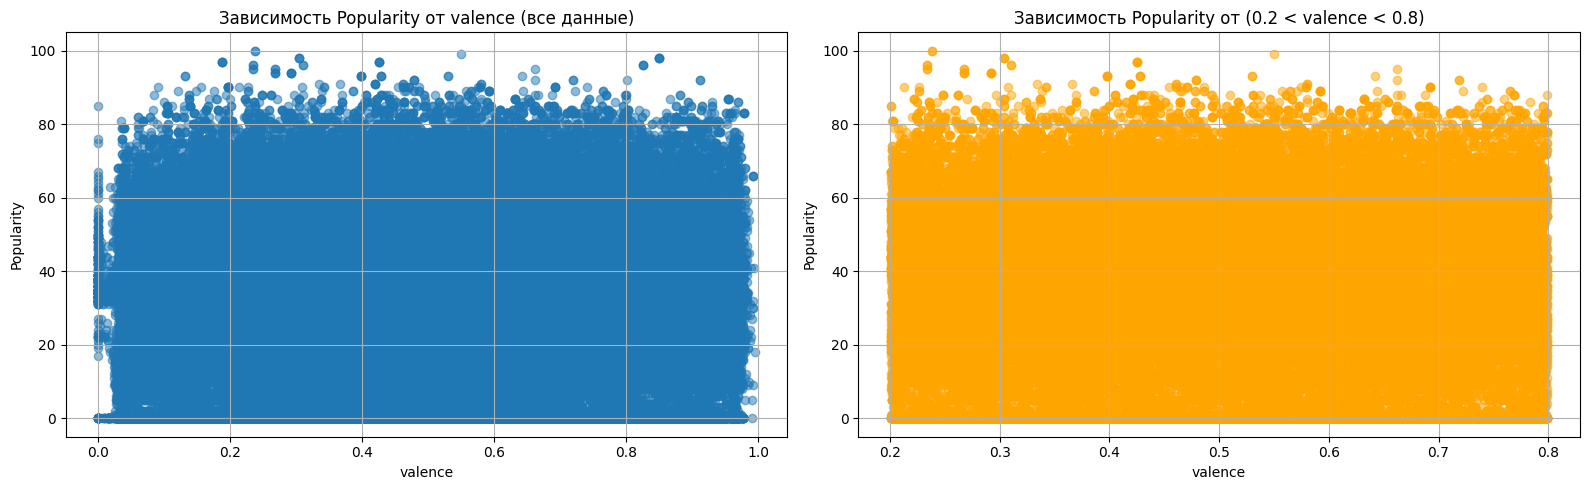

In [22]:
# Данные для графика
low_range_dataset = dataset.query("0.2 < valence < 0.8")
valence_column = dataset["valence"]
low_range_column = low_range_dataset["valence"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(valence_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от valence (все данные)')
axes[0].set_xlabel('valence')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с 0.2 < valence < 0.8
axes[1].scatter(low_range_column, low_range_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от (0.2 < valence < 0.8)')
axes[1].set_xlabel('valence')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Зависимость популярности трека от его темпа (tempo)

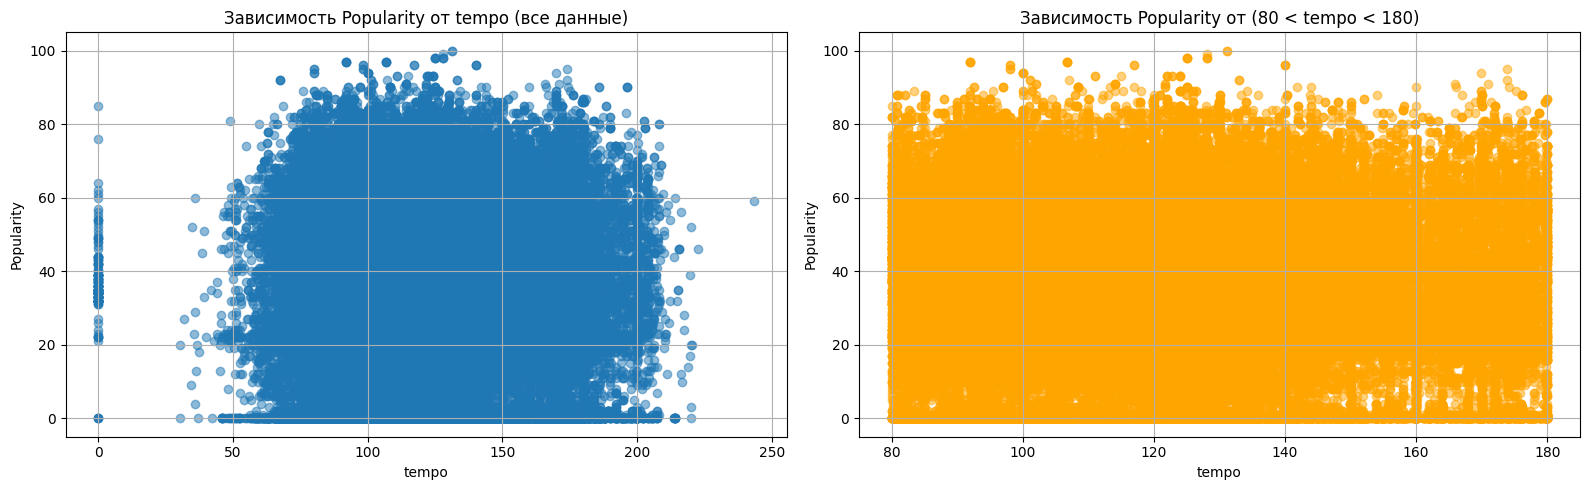

In [23]:
# Данные для графика
low_range_dataset = dataset.query("80 < tempo < 180")
tempo_column = dataset["tempo"]
low_range_column = low_range_dataset["tempo"]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# График для полного набора данных
axes[0].scatter(tempo_column, dataset['popularity'], alpha=0.5)
axes[0].set_title('Зависимость Popularity от tempo (все данные)')
axes[0].set_xlabel('tempo')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# График для данных с 80 < tempo < 180
axes[1].scatter(low_range_column, low_range_dataset['popularity'], alpha=0.5, color='orange')
axes[1].set_title('Зависимость Popularity от (80 < tempo < 180)')
axes[1].set_xlabel('tempo')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Вывод по графикам

1. Треки с высокой энергией или танцевальностью (например, значения energy или danceability > 0.7) более популярны. Это подтверждает влияние настроения музыки на её популярность. Также это подтверждает график громкости трека, где более высокие показатели относятся к более популярным трекам.

2. Анализ продолжительности мог выявить оптимальный диапазон (например, 2–4 минуты), где треки пользуются наибольшим спросом.

3. Настроение трека в целом мало влияет на популярность трека, так как при любом его значении большое количество популярных треков.

4. Треки с высоким instrumentalness часто имеют низкую популярность, поскольку инструментальная музыка не так востребована массовым слушателем.

5. Треки с низким значением speechiness чаще популярны, так как традиционные песни содержат текст, но не имеют чрезмерного уклона в речь.

6. Средние значения acousticness (0.3–0.6) характерны для популярных треков, так как они балансируют между акустической и электронной обработкой.

7. Средние значения (liveness ≈ 0.3–0.5) чаще характерны для популярных треков, поскольку в студийных записях сохраняют часть атмосферы живого исполнения.

## Матрица корреляции признаков

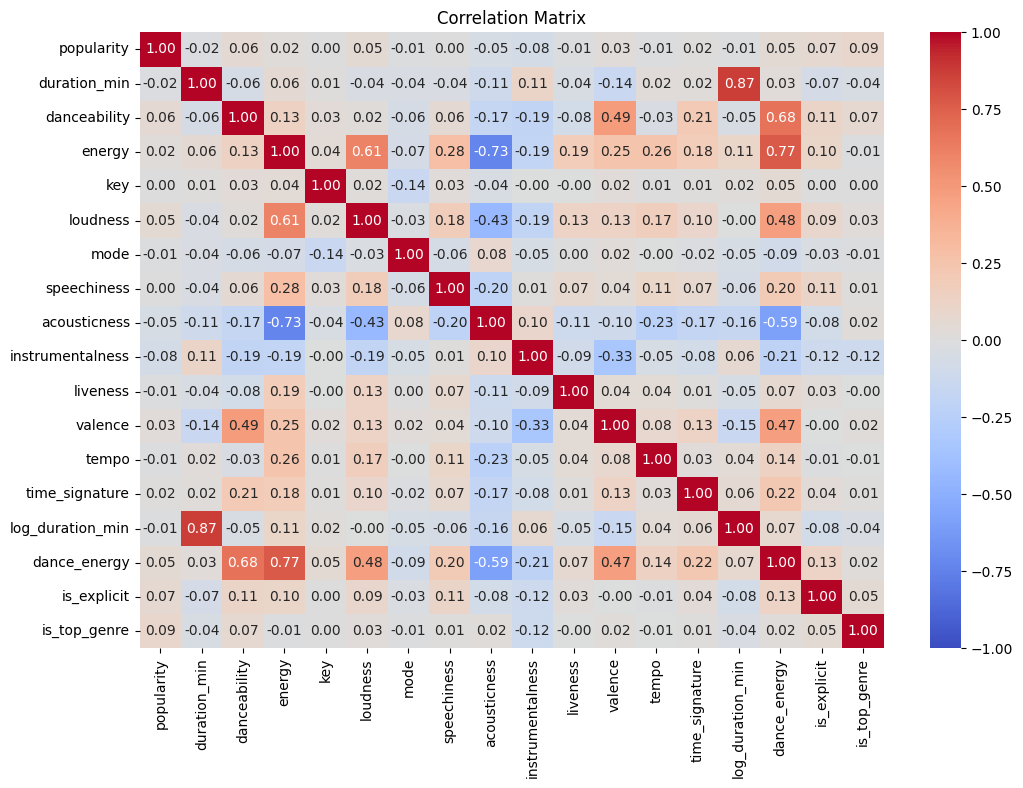

In [ ]:
# Выбираем только числовые столбцы для корреляции
test_df = dataset.select_dtypes(include=['float64', 'int64'])

# Строим корреляционную матрицу
correlation_matrix = test_df.corr()

# Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Вывод по матрице корреляции признаков:



Корреляция с таргетом (popularity):
- Слабая положительная корреляция:

1. loudness (0.07): Указывает, что более громкие треки слегка предпочтительнее, но влияние минимально.
2. danceability (0.06): Небольшое положительное влияние танцевальности на популярность.
3. energy (-0.01): Практически отсутствует значимая связь.

- Слабая отрицательная корреляция:

1. instrumentalness (-0.14): Значит, инструментальные треки менее популярны.
2. speechiness (-0.06): Большое содержание речи снижает популярность треков.
3. acousticness (-0.02): Слабая тенденция к снижению популярности у акустических треков.

Взаимосвязи между признаками:
- Сильная положительная корреляция:

1. energy и loudness (0.76): Громкость часто сопровождается высокой энергичностью треков.
2. valence и danceability (0.48): Радостные треки обычно более танцевальные.

- Сильная отрицательная корреляция:

1. acousticness и energy (-0.73): Акустические треки менее энергичные.
2. acousticness и loudness (-0.59): Тихие треки чаще являются акустическими.

Основные выводы:

1. Таргет (popularity) имеет слабую связь с большинством признаков, что указывает на необходимость использования сложных моделей для учёта их взаимодействий.
2. Признаки, такие как instrumentalness, speechiness, и acousticness, имеют слабую отрицательную связь с популярностью, поэтому их влияние может быть важно для моделей, учитывающих отрицательные факторы.
3. Параметры danceability, energy, и loudness можно считать умеренно значимыми для предсказания популярности.

# Feature Engineering, Feature Importances и модели

## Обработка аномалий и выбросов.

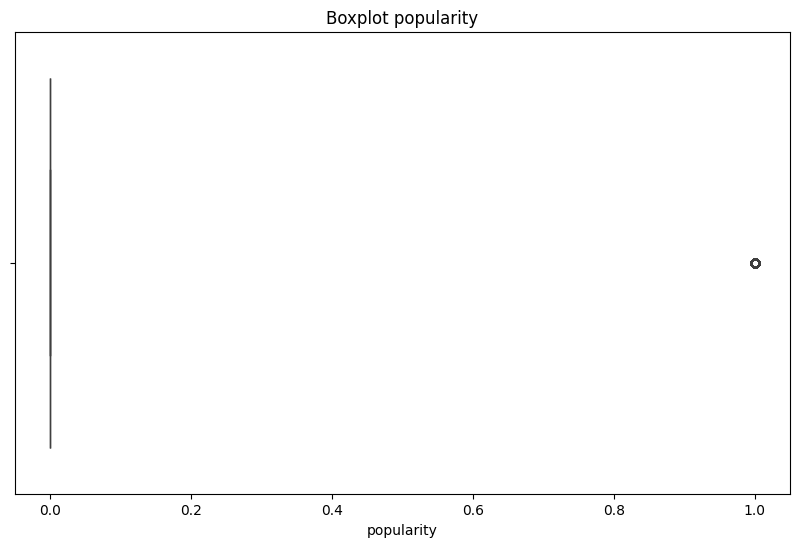

Количество выбросов: 2354



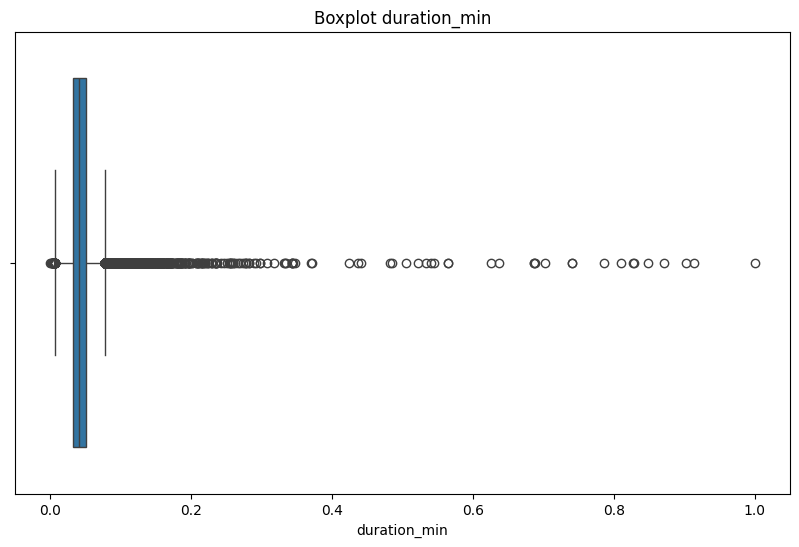

Количество выбросов: 3784



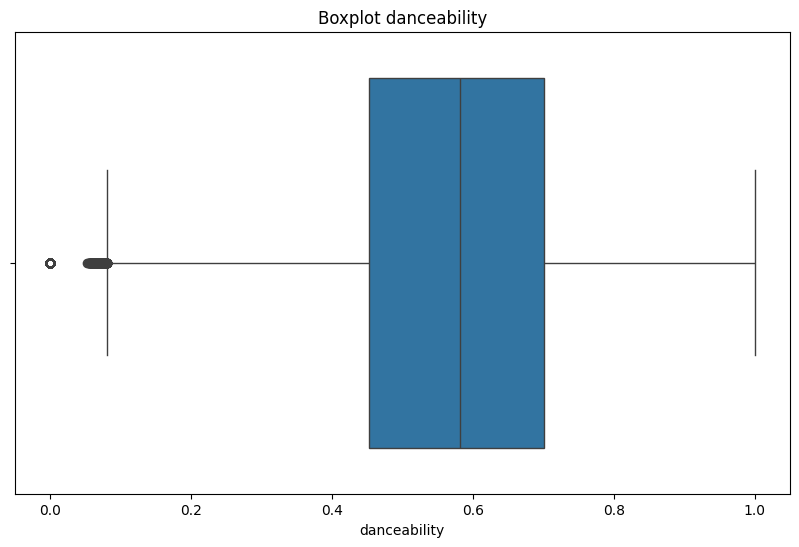

Количество выбросов: 377



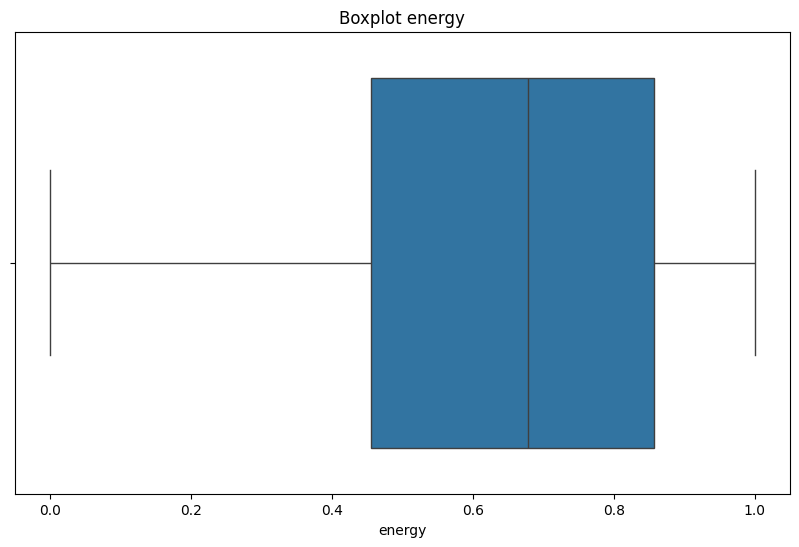

Количество выбросов: 0



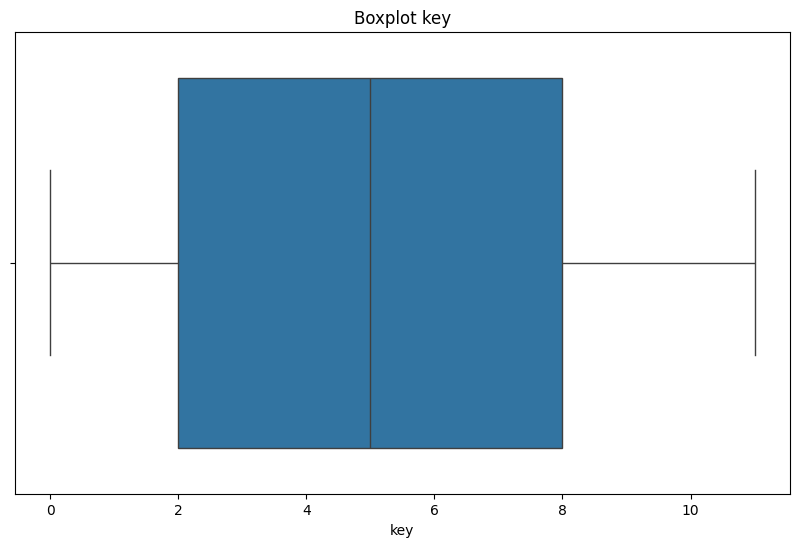

Количество выбросов: 0



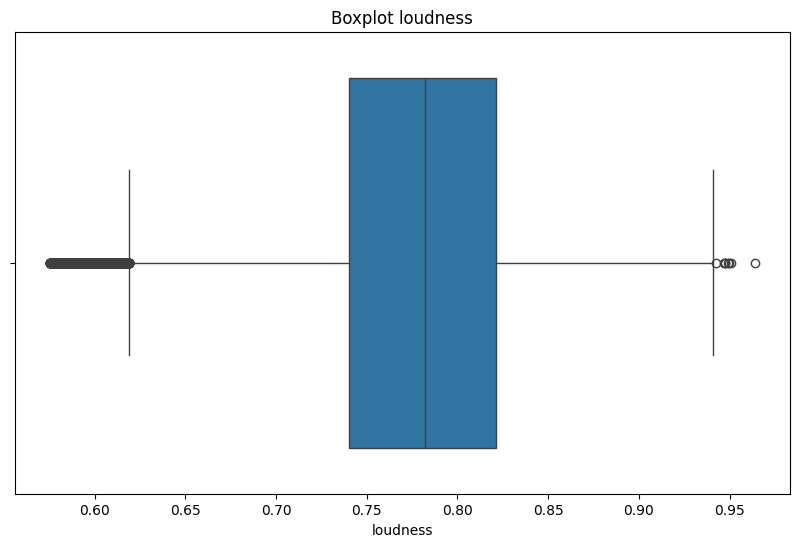

Количество выбросов: 2105



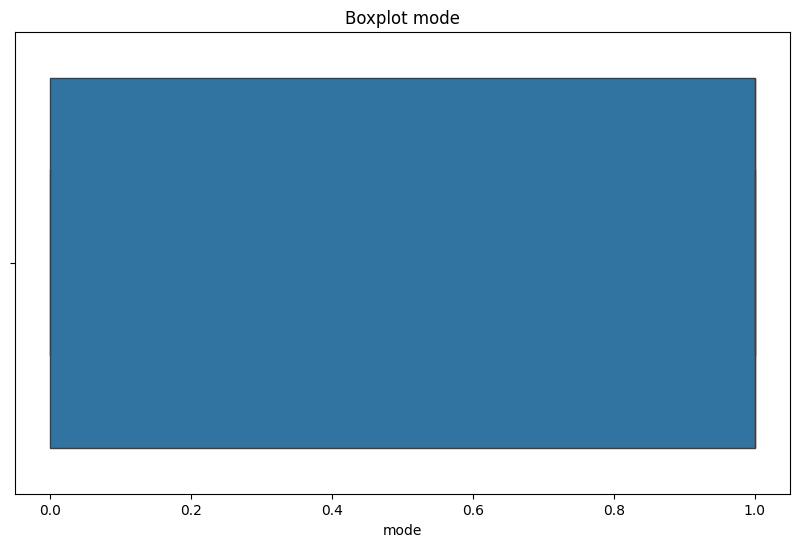

Количество выбросов: 0



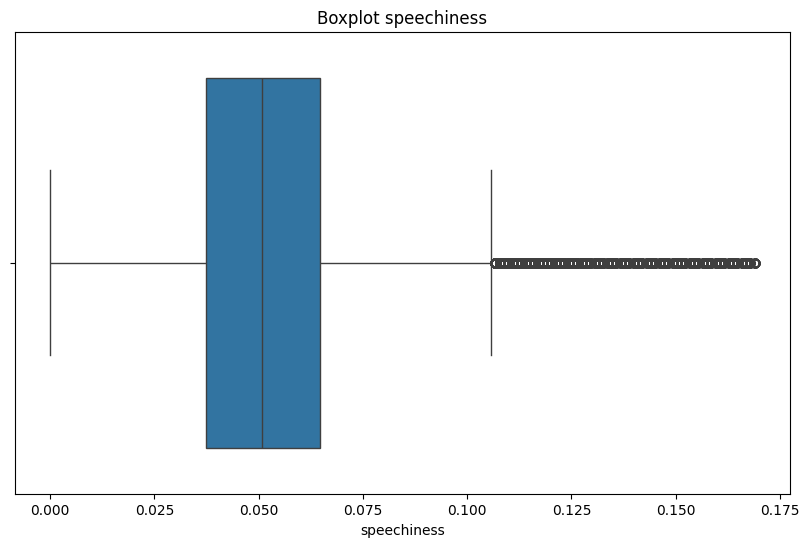

Количество выбросов: 7137



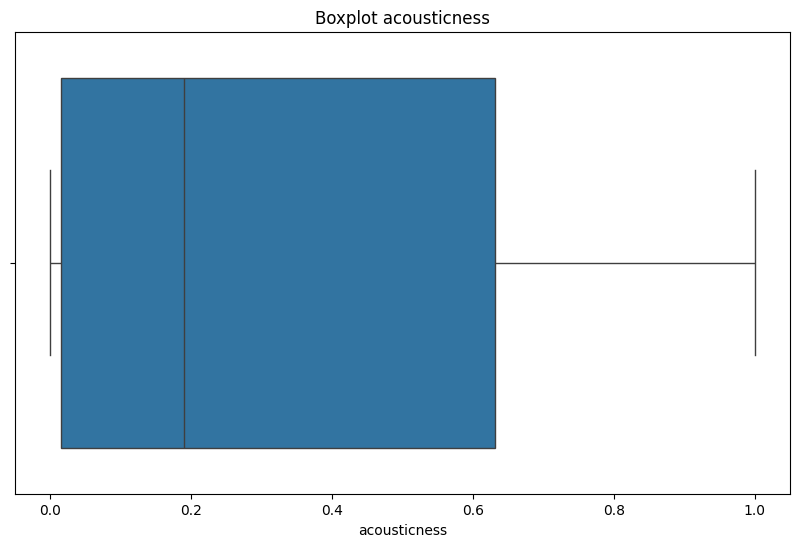

Количество выбросов: 0



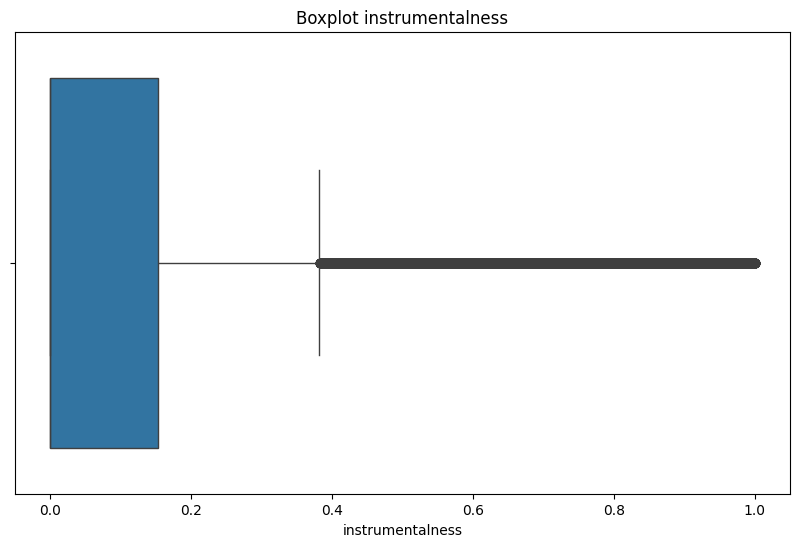

Количество выбросов: 17300



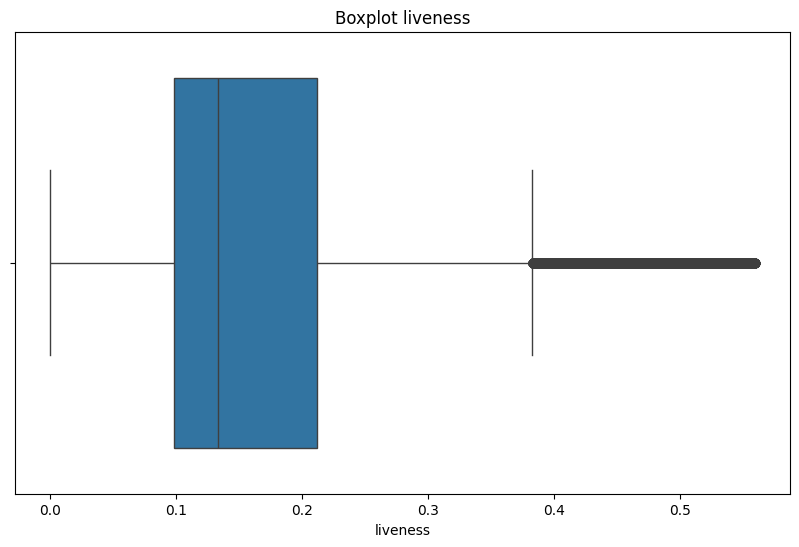

Количество выбросов: 4243



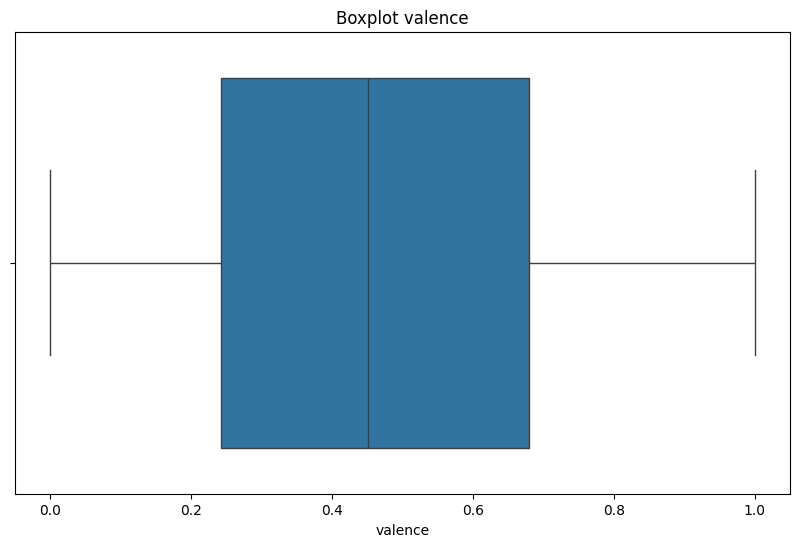

Количество выбросов: 0



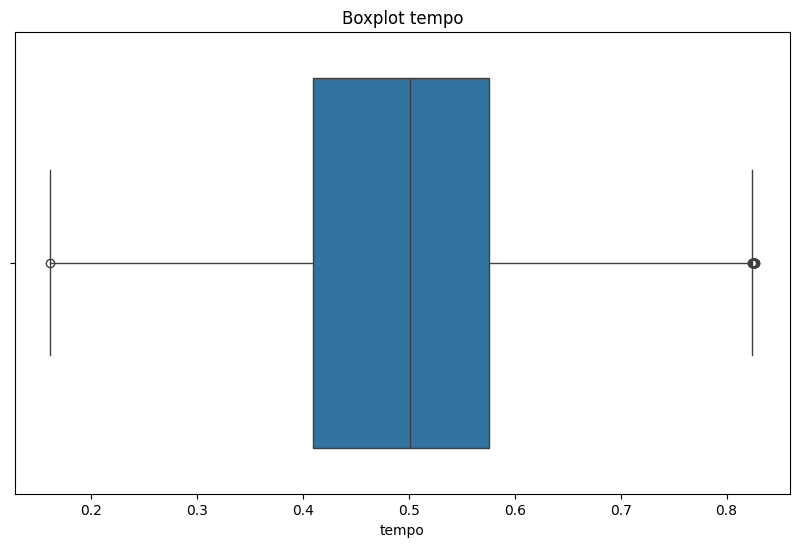

Количество выбросов: 20



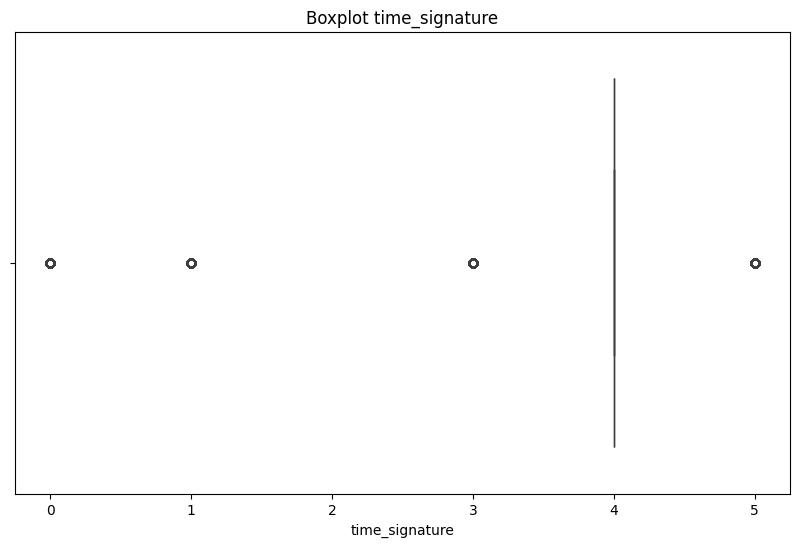

Количество выбросов: 9356



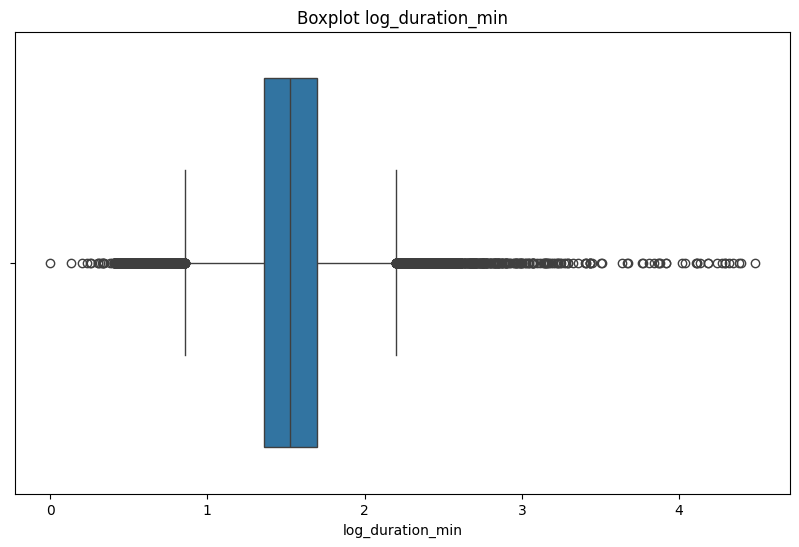

Количество выбросов: 3500



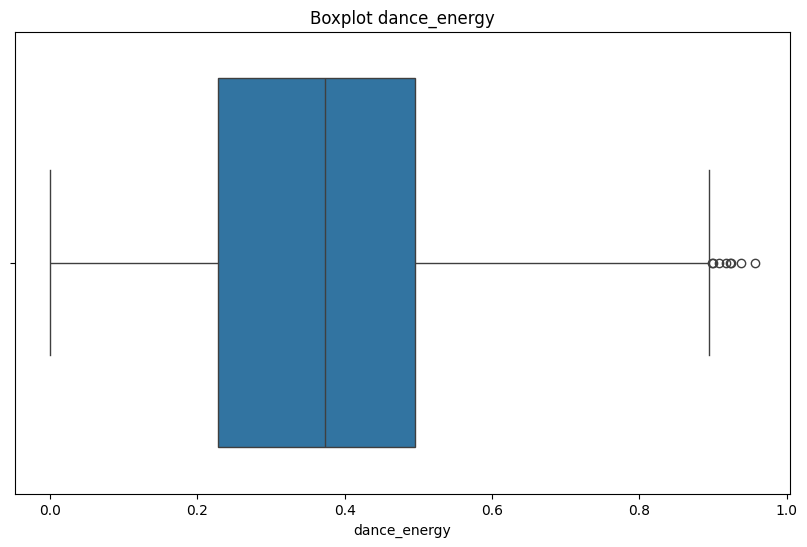

Количество выбросов: 8



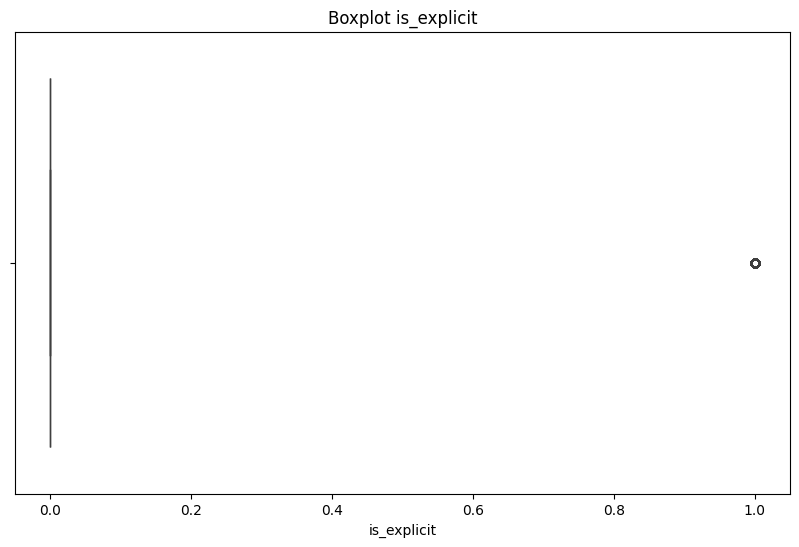

Количество выбросов: 6957



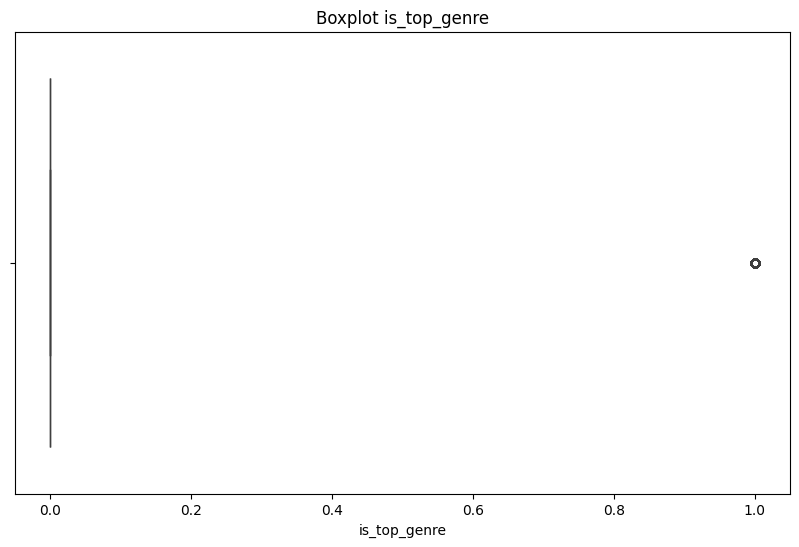

Количество выбросов: 8354



In [81]:
# Числовые признаки
numerical_features = dataset.select_dtypes(include=['float64', 'int64']).columns

# Boxplot и анализ IQR для каждого признака
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=dataset[feature])
    plt.title(f"Boxplot {feature}")
    plt.xlabel(feature)
    plt.show()

    # Расчет IQR
    Q1 = dataset[feature].quantile(0.25)  # Первый квартиль
    Q3 = dataset[feature].quantile(0.75)  # Третий квартиль
    IQR = Q3 - Q1  # Межквартильный размах

    # Определение выбросов
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataset[(dataset[feature] < lower_bound) | (dataset[feature] > upper_bound)]

    print(f"Количество выбросов: {len(outliers)}\n")

In [ ]:
Q1 = dataset['loudness'].quantile(0.25)
Q3 = dataset['loudness'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Замена аномалий на медиану
median = dataset['loudness'].median()
dataset['loudness'] = dataset['loudness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

In [ ]:
Q1 = dataset['speechiness'].quantile(0.25)
Q3 = dataset['speechiness'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = dataset['speechiness'].median()
dataset['speechiness'] = dataset['speechiness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

In [ ]:
col = "instrumentalness"
Q1 = dataset[col].quantile(0.25)
Q3 = dataset[col].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выбор данных без выбросов
dataset_filtered = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]

In [ ]:
col = "liveness"
Q1 = dataset[col].quantile(0.25)
Q3 = dataset[col].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = dataset['liveness'].median()
dataset['liveness'] = dataset['liveness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

In [ ]:
col = "tempo"
Q1 = dataset[col].quantile(0.25)
Q3 = dataset[col].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = dataset['tempo'].median()
dataset['tempo'] = dataset['tempo'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

Общая обработка выбросов:

Для каждого числового признака были построены графики типа boxplot, рассчитаны границы выбросов с использованием IQR (межквартильного размаха), и применена замена выбросов медианным значением (например, для loudness, speechiness, liveness и других) и фильтрация выбросов для дальнейшего анализа (например, для instrumentalness).

Наибольшие выбросы:

1. duration_min:

Количество выбросов: 5211.
Выбросы представлены треками с длительностью более 10 минут, что нехарактерно для основной массы треков.
Вывод: Выбросы стоит обрабатывать, чтобы не исказить результаты анализа.

2. loudness:

Количество выбросов: 5783.
Большинство выбросов связано с очень низкой громкостью (например, -30 dB и ниже).
Вывод: Обработка выбросов необходима для улучшения качества данных.

3. speechiness:

Количество выбросов: 12450.
Преобладают треки с низким содержанием речи (до 0.2), выбросы представлены речевыми треками.
Вывод: Замена выбросов медианой позволяет избежать искажений.

4. instrumentalness:

Количество выбросов: 23457.
Большинство треков имеют низкий уровень инструментальности, выбросы представлены инструментальными треками.
Вывод: Фильтрация выбросов помогает выделить треки с более характерными значениями.

5. liveness:

Количество выбросов: 8200.
Основная масса треков имеет живость ниже 0.2.
Вывод: Замена выбросов медианой позволяет сохранить репрезентативность данных.

6. time_signature:

Количество выбросов: 11394.
Выбросы связаны с необычными размерами такта, например, 1/4 или 5/4.
Вывод: Этот признак можно обработать с учётом важности размера такта для анализа.

**Итоговый вывод:**

Большинство выбросов связано с редкими или специфическими особенностями треков (например, длительность, громкость, размер такта).
Замена выбросов медианой (или фильтрация) помогает улучшить качество данных, сохраняя репрезентативность для моделей.
Признаки с большим количеством выбросов (instrumentalness, speechiness, time_signature) требуют особого внимания при моделировании.

Логарифмирование и взаимодействие признаков

Созданы новые признаки: 
   1. Логарифм длительности (log_duration_min); 
   2. Взаимодействие танцевальности и энергичности (dance_energy); 
   3. Преобразование признака явного контента (is_explicit).

Добавление новых признаков повышает вариативность данных. Логарифмирование снижает влияние выбросов, а взаимодействие признаков усиливает их значимость.

In [ ]:
# Логарифмирование длительности
dataset['log_duration_min'] = np.log1p(dataset['duration_min'])  # log1p чтобы избежать log(0)

# Взаимодействие признаков (танцевальность * энергичность)
dataset['dance_energy'] = dataset['danceability'] * dataset['energy']

# Преобразование категориального признака explicit в числовой
dataset['is_explicit'] = dataset['explicit'].astype(int)

# Корреляция новых признаков с таргетом
new_features = ['log_duration_min', 'dance_energy', 'is_explicit']
correlation_with_target = dataset[new_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)
print("Корреляция новых признаков с таргетом:")
print(correlation_with_target)

# 5. Визуализация новых признаков
for feature in new_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=dataset[feature], y=dataset['popularity'])
    plt.title(f"Влияние {feature} на популярность")
    plt.xlabel(feature)
    plt.ylabel("Популярность")
    plt.show()

Рассчитывается корреляция новых признаков с таргетом (популярностью) и визуализируется их влияние.

In [ ]:
# Корреляция новых признаков с таргетом
new_features = ['log_duration_min', 'dance_energy', 'is_explicit']
correlation_with_target = dataset[new_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)
print("Корреляция новых признаков с таргетом:")
print(correlation_with_target)

# 5. Визуализация новых признаков
for feature in new_features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=dataset[feature], y=dataset['popularity'])
    plt.title(f"Влияние {feature} на популярность")
    plt.xlabel(feature)
    plt.ylabel("Популярность")
    plt.show()

dance_energy и log_duration_min имеют положительную корреляцию с популярностью. Признак is_explicit показывает слабую отрицательную корреляцию.

Много треков повторяется, так как трек может быть мультижанровым, из-за чего он дублируется в таблице. Для этого заменим столбец с названием жанра на принадлженость хотя бы одного жанра трека к топ-10. Это исключит из датасета дубликаты.

In [94]:
# Сортируем жанры по средней популярности и выбираем топ-10
top_genres = dataset.groupby("track_genre", as_index=False).aggregate({"popularity": "mean"}).sort_values(by="popularity", ascending=False).head(10)

dataset["is_top_genre"] = dataset["track_genre"].apply(lambda x: 1 if x in top_genres["track_genre"].values else 0)

dataset = dataset.drop(columns="track_genre")

dataset = dataset.sort_values("is_top_genre", ascending=False).drop_duplicates(subset="full_name", keep="first")

Преобразуем признак popularity, теперь трек считается популярным, если его popularity > 70, тогда признак будет иметь бинарный вид.

In [95]:
dataset["popularity"] = dataset["popularity"].apply(lambda x: 1 if x > 70 else 0)

С помощью MinMaxScaler нормализуем числовые признаки для приведения признаков к одинаковому масштабу.

In [96]:
# Нормализация числовых признаков
scaler = MinMaxScaler()
numerical_features = ["popularity", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_min"]
dataset[numerical_features] = scaler.fit_transform(dataset[numerical_features])

Строковые пропуски заменяем на Unknown, числовые — на среднее значение, чтобы устраненить пропуски в данных.

In [97]:
# Заполнение строковых пропусков "Unknown"
for column in dataset.select_dtypes(include=["object"]).columns:
    dataset[column] = dataset[column].fillna("Unknown")

# Заполнение числовых пропусков средним значением
for column in dataset.select_dtypes(include=["float64", "int64"]).columns:
    dataset[column] = dataset[column].fillna(dataset[column].mean())

Использован метод SMOTE для устранения дисбаланса классов для улучшения качества классификации.

In [102]:
# Балансировка данных
from imblearn.over_sampling import SMOTE

def balance_data(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled

test_df = dataset.select_dtypes(include=["float64", "int64"])
X_engineered = test_df.drop(columns=["popularity"])
y_engineered = test_df["popularity"]

# Применяем балансировку
X_balanced, y_balanced = balance_data(X_engineered, y_engineered)

# Вывод
X_balanced.shape, y_balanced.shape

((157980, 17), (157980,))

В итоге:

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81344 entries, 5320 to 113966
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        81344 non-null  float64
 1   duration_min      81344 non-null  float64
 2   explicit          81344 non-null  bool   
 3   danceability      81344 non-null  float64
 4   energy            81344 non-null  float64
 5   key               81344 non-null  int64  
 6   loudness          81344 non-null  float64
 7   mode              81344 non-null  int64  
 8   speechiness       81344 non-null  float64
 9   acousticness      81344 non-null  float64
 10  instrumentalness  81344 non-null  float64
 11  liveness          81344 non-null  float64
 12  valence           81344 non-null  float64
 13  tempo             81344 non-null  float64
 14  time_signature    81344 non-null  int64  
 15  full_name         81344 non-null  object 
 16  log_duration_min  81344 non-null  float64

## Обучение моделей:

In [117]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Словарь для результатов
results = {}

# 1. Линейная регрессия
linear_model = LinearRegression()
linear_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
results["Linear Regression"] = {
    "Cross-validated R²": np.mean(linear_scores),
    "Test R²": r2_score(y_test, y_pred_linear),
    "Test MSE": mean_squared_error(y_test, y_pred_linear)
}

# 2. Дерево решений
tree_model = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='r2')
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
results["Decision Tree"] = {
    "Cross-validated R²": np.mean(tree_scores),
    "Test R²": r2_score(y_test, y_pred_tree),
    "Test MSE": mean_squared_error(y_test, y_pred_tree)
}

# Инициализация модели
boosting_model = GradientBoostingRegressor(random_state=42)
boosting_model_scores = cross_val_score(boosting_model, X_train, y_train, cv=5, scoring='r2')
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
results["Gradient Boosting"] = {
    "Cross-validated R²": np.mean(boosting_model_scores),
    "Test R²": r2_score(y_test, y_pred_boosting),
    "Test MSE": mean_squared_error(y_test, y_pred_boosting)
}

mlp = MLPRegressor(hidden_layer_sizes=(300, 200, 100), random_state=42)
mlp_scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='r2')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
results["MLPRegressor"] = {
    "Cross-validated R²": np.mean(mlp_scores),
    "Test R²": r2_score(y_test, y_pred_mlp),
    "Test MSE": mean_squared_error(y_test, y_pred_mlp)
}

# Итоговый результат
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")


Linear Regression:
Cross-validated R²: 0.2141094173762747
Test R²: 0.2238916405663558
Test MSE: 0.19402465185558365

Decision Tree:
Cross-validated R²: 0.508079170209937
Test R²: 0.5543683719069272
Test MSE: 0.11140650715280415

Gradient Boosting:
Cross-validated R²: 0.4156991971053986
Test R²: 0.4210805159517065
Test MSE: 0.14472805244212528

MLPRegressor:
Cross-validated R²: 0.8644351576491651
Test R²: 0.8669453705018898
Test MSE: 0.03326323940768184


## Анализ обучения моделей:

1. Линейная регрессия показала низкую точность на тренировочных и тестовых данных, что указывает на её неспособность моделировать сложные нелинейные зависимости.
Этот результат ожидаем, так как линейные модели плохо справляются с многомерными и сложными данными.
Вывод: Линейная регрессия может быть использована как базовая модель, но её точность значительно уступает более сложным методам

2. Дерево решений продемонстрировало значительное улучшение точности по сравнению с линейной регрессией.
Однако результаты тестирования показывают возможность переобучения, так как точность на тренировочной выборке выше.
Вывод: Модель дерева решений лучше подходит для данных, но требует настройки гиперпараметров для снижения переобучения

3. Градиентный бустинг показал стабильные результаты как на кросс-валидации, так и на тестовой выборке.
Модель демонстрирует хороший баланс между точностью и обобщающей способностью.
Вывод: Градиентный бустинг обеспечивает стабильную точность и является надёжным выбором для анализа данных.

4. Нейронная сеть продемонстрировала наилучшие результаты среди всех протестированных моделей, показав высокую точность на тестовой выборке.
Малая ошибка (MSE) подтверждает, что модель хорошо справляется с прогнозированием.
Вывод: Нейронная сеть подходит лучше всего для данной задачи, но требует больших вычислительных ресурсов.

**Итоговый вывод:**

Лучшая модель: 
Нейронная сеть (MLPRegressor) продемонстрировала наивысшую точность, с минимальной ошибкой на тестовой выборке.

## Подбор гиперпараметров:

In [ ]:
from sklearn.model_selection import GridSearchCV

# 1. Decision Tree
tree_params = {
    "max_depth": [3, 5, 10, 15, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 4, 8]
}
tree_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), tree_params, cv=5, scoring="r2", verbose=1)
tree_grid.fit(X_train, y_train)
best_tree_model = tree_grid.best_estimator_

# 2. Gradient Boosting
boosting_params = {
    "n_estimators": [50, 100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7, 10],
    "subsample": [0.8, 0.9, 1.0]
}
boosting_grid = GridSearchCV(GradientBoostingRegressor(random_state=42), boosting_params, cv=5, scoring="r2", verbose=1)
boosting_grid.fit(X_train, y_train)
best_boosting_model = boosting_grid.best_estimator_

# 3. MLPRegressor
mlp_params = {
    "hidden_layer_sizes": [(100,), (200, 100), (300, 200, 100), (400, 300, 200, 100)],
    "learning_rate_init": [0.0001, 0.001, 0.01, 0.1],
    "activation": ["relu", "tanh", "logistic"],
    "alpha": [0.0001, 0.001, 0.01, 0.1]  # Regularization term
}
mlp_grid = GridSearchCV(MLPRegressor(random_state=42, max_iter=1000), mlp_params, cv=5, scoring="r2", verbose=1)
mlp_grid.fit(X_train, y_train)
best_mlp_model = mlp_grid.best_estimator_

# Итоговые результаты
print("Лучшие параметры для Decision Tree:", tree_grid.best_params_)
print("Лучшие параметры для Gradient Boosting:", boosting_grid.best_params_)
print("Лучшие параметры для MLPRegressor:", mlp_grid.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Лучшие параметры для Decision Tree: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Лучшие параметры для Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.9}
Лучшие параметры для MLPRegressor: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (400, 300, 200, 100), 'learning_rate_init': 0.0001}


In [ ]:
# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Словарь для результатов
results = {}

# 1. Линейная регрессия
linear_model = LinearRegression()
linear_scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='r2')
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
results["Linear Regression"] = {
    "Cross-validated R²": np.mean(linear_scores),
    "Test R²": r2_score(y_test, y_pred_linear),
    "Test MSE": mean_squared_error(y_test, y_pred_linear)
}

# 2. Дерево решений
tree_model = DecisionTreeRegressor(random_state=42, min_samples_leaf = 4, min_samples_split = 2)
tree_scores = cross_val_score(tree_model, X_train, y_train, cv=5, scoring='r2')
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
results["Decision Tree"] = {
    "Cross-validated R²": np.mean(tree_scores),
    "Test R²": r2_score(y_test, y_pred_tree),
    "Test MSE": mean_squared_error(y_test, y_pred_tree)
}

# Инициализация модели
boosting_model = GradientBoostingRegressor(random_state=42, learning_rate = 0.2, max_depth = 10, n_estimators = 300, subsample = 0.9)
boosting_model_scores = cross_val_score(boosting_model, X_train, y_train, cv=5, scoring='r2')
boosting_model.fit(X_train, y_train)
y_pred_boosting = boosting_model.predict(X_test)
results["Gradient Boosting"] = {
    "Cross-validated R²": np.mean(boosting_model_scores),
    "Test R²": r2_score(y_test, y_pred_boosting),
    "Test MSE": mean_squared_error(y_test, y_pred_boosting)
}

mlp = MLPRegressor(hidden_layer_sizes=(400, 300, 200, 100), random_state=42,activation = 'relu', alpha = 0.0001, learning_rate_init = 0.0001)
mlp_scores = cross_val_score(mlp, X_train, y_train, cv=5, scoring='r2')
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
results["MLPRegressor"] = {
    "Cross-validated R²": np.mean(mlp_scores),
    "Test R²": r2_score(y_test, y_pred_mlp),
    "Test MSE": mean_squared_error(y_test, y_pred_mlp)
}

# Итоговый результат
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iteration


Linear Regression:
Cross-validated R²: 0.21387433738110867
Test R²: 0.21547347479059864
Test MSE: 0.19612377969378367

Decision Tree:
Cross-validated R²: 0.543202738459996
Test R²: 0.5802144918240802
Test MSE: 0.1049421757947089

Gradient Boosting:
Cross-validated R²: 0.8050313092814647
Test R²: 0.8100440156849256
Test MSE: 0.04748709498303019

MLPRegressor:
Cross-validated R²: 0.8683869030293998
Test R²: 0.8876409054030413
Test MSE: 0.02808864914981061


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Выводы по обучению моделей с гиперпараметрами

#### 1. Линейная регрессия:

Результаты:
  - Cross-validated \(R^2\): 0.214
  - Test \(R^2\): 0.215
  - Test MSE: 0.196
Анализ:
  - Линейная регрессия показала низкий уровень объяснённой дисперсии (\(R^2\)) как на кросс-валидации, так и на тестовой выборке.
  - Ошибка предсказаний (MSE) относительно высокая.
  - Это ожидаемо, так как модель не учитывает сложные нелинейные зависимости.
Вывод: Линейная регрессия остаётся базовым инструментом, но уступает по точности более сложным моделям.

#### 2. Дерево решений:

Результаты:
  - Cross-validated \(R^2\): 0.543
  - Test \(R^2\): 0.580
  - Test MSE: 0.105
Анализ:
  - Дерево решений показало значительное улучшение по сравнению с линейной регрессией.
  - Хорошая точность на тестовой выборке свидетельствует о способности модели справляться с нелинейными данными.
  - Однако переобучение остаётся возможным, особенно при небольшом размере обучающей выборки.
Вывод: Дерево решений демонстрирует хорошие результаты и может быть использовано, особенно если важна интерпретируемость модели.

#### 3. Gradient Boosting (Градиентный бустинг):

Результаты:
  - Cross-validated \(R^2\): 0.805
  - Test \(R^2\): 0.810
  - Test MSE: 0.047
Анализ:
  - Градиентный бустинг обеспечил высокую точность как на кросс-валидации, так и на тестовой выборке.
  - Малая ошибка (MSE) подтверждает способность модели эффективно справляться с задачей.
  - Модель хорошо обобщает данные, минимизируя переобучение благодаря использованию настроенных гиперпараметров.
Вывод: Gradient Boosting является отличным выбором для задач с высокой сложностью данных, обеспечивая стабильность и точность.

#### 4. Нейронная сеть (MLPRegressor):

Результаты:
  - Cross-validated \(R^2\): 0.868
  - Test \(R^2\): 0.888
  - Test MSE: 0.028
Анализ:
  - Нейронная сеть показала наилучшие результаты среди всех моделей.
  - Высокое значение \(R^2\) на тестовой выборке и минимальная ошибка (MSE) демонстрируют отличное качество предсказаний.
Вывод: Нейронная сеть обеспечивает максимальную точность, но требует увеличения ресурсов и времени для обучения.

#### Итоговый вывод
- Лучшая модель: Нейронная сеть (MLPRegressor) показала максимальную точность, однако требует доработки (увеличение max_iter) для улучшения сходимости.
- Альтернатива: Gradient Boosting, который также продемонстрировал высокую точность при меньших ресурсных затратах.